## **Project : Facial Expression Recognition Using CNN**
###**By : Anirban Debnath, Arpan Datta, Sachin Sarkar, Sayan Mondal**
**Objective : Model will predict the emotion of a person by analyzing the Image.**

Mounting to drive to access Dataset and Images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the required Python Libraries

In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.preprocessing import image
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import BatchNormalization
from keras.regularizers import l2

Importing the Dataset FER2013 as a csv file.
This are the some images in FER2013 Dataset
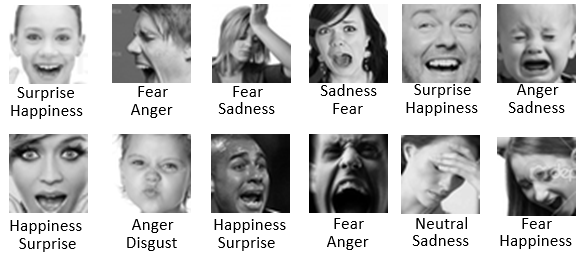



In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/face_emotions/fer2013.csv')
print(dataset.head())
print(dataset.info())

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None


Let divide the Dataset into Training and Testing

In [ ]:
x_train,y_train,x_test,y_test = [],[],[],[]
for index,row in dataset.iterrows():
  val = row['pixels'].split(' ')
  try:
    if 'Training' in row['Usage']:
      x_train.append(np.array(val,'float32'))
      y_train.append(row['emotion'])
    elif 'PublicTest' in row['Usage']:
      x_test.append(np.array(val,'float32'))
      y_test.append(row['emotion'])
  except:
    print("Error occured at index :",index,"and row :",row)

Preprocessing the Dataset


In [ ]:
x_train = np.array(x_train,'float32')
y_train = np.array(y_train,'float32')
x_test = np.array(x_test,'float32')
y_test = np.array(y_test,'float32')

y_train = to_categorical(y_train,num_classes=7)
y_test = to_categorical(y_test,num_classes=7)

x_train /= 255.0
x_test /= 255.0

x_train = x_train.reshape(x_train.shape[0],48,48,1)
x_test = x_test.reshape(x_test.shape[0],48,48,1)

print("x_train Shape : ",x_train.shape)
print("x_test.shape : ",x_test.shape)

x_train Shape :  (28709, 48, 48, 1)
x_test.shape :  (3589, 48, 48, 1)


**CNN Model Building**

In [ ]:
num_features = 64
num_labels = 7

model = Sequential()

model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1),
                 data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(2*2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 128)       5

**Compile and Fitting training dataset to the CNN Model**

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=287,epochs=100,verbose=1,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/100
101/101 [==============================] - 72s 201ms/step - loss: 2.5269 - accuracy: 0.1931 - val_loss: 1.8721 - val_accuracy: 0.2494
Epoch 2/100
101/101 [==============================] - 18s 179ms/step - loss: 1.8672 - accuracy: 0.2310 - val_loss: 1.8357 - val_accuracy: 0.2494
Epoch 3/100
101/101 [==============================] - 19s 188ms/step - loss: 1.8389 - accuracy: 0.2412 - val_loss: 1.8239 - val_accuracy: 0.2494
Epoch 4/100
101/101 [==============================] - 19s 189ms/step - loss: 1.8270 - accuracy: 0.2431 - val_loss: 1.8035 - val_accuracy: 0.2494
Epoch 5/100
101/101 [==============================] - 19s 185ms/step - loss: 1.8070 - accuracy: 0.2516 - val_loss: 1.8136 - val_accuracy: 0.2499
Epoch 6/100
101/101 [==============================] - 18s 181ms/step - loss: 1.7724 - accuracy: 0.2768 - val_loss: 1.7286 - val_accuracy: 0.3073
Epoch 7/100
101/101 [==============================] - 18s 183ms/step - loss: 1.7275 - accuracy: 0.3046 - val_loss: 1.6905 -

**Save Model to Json**

In [ ]:
fer_json = model.to_json()
with open('fer.json','w') as json_file:
  json_file.write(fer_json)
model.save_weights('fer.h5')

**Now our model is trained and ready to Predict now.**
##### **let test the model and get result and output**

surprise
[4.8938429e-04 2.3620137e-09 9.3871182e-05 4.5723301e-01 2.5112189e-03
 1.5378767e-04 5.3951877e-01]
surprise
[4.6844523e-02 1.6783021e-04 4.1101608e-02 2.7136039e-02 6.0933489e-02
 1.2440691e-02 8.1137586e-01]
happy
[1.6053488e-11 8.6290733e-28 8.7686065e-13 1.0000000e+00 5.9242090e-11
 1.6721588e-13 9.8784803e-09]
happy
[8.255025e-03 9.084641e-06 6.219322e-03 6.430771e-01 2.188899e-02
 6.937715e-03 3.136128e-01]


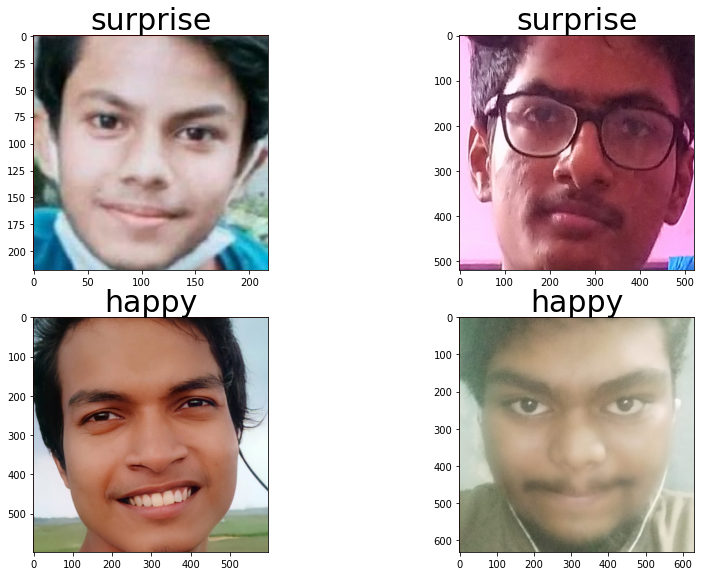

In [ ]:
categories = ['angry','disgust','fear','happy','neutral','sad','surprise']

plt.figure(figsize=(14,9.5))

plt.subplot(2,2,1)
img = cv2.imread('/content/anirban_denath.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(img,1.1,4)
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0))
  roi_gray = img[y:y+w,x:x+h]
img = cv2.cvtColor(roi_gray,cv2.COLOR_RGB2GRAY)
img = cv2.resize(img,(48,48))
img_pixels = image.img_to_array(img)
img_pixels = np.expand_dims(img_pixels,axis=0)
img_pixels /= 255
pred = model.predict(img_pixels)
max_index = np.argmax(pred[0])
emotion = categories[max_index]
print(emotion)
print(pred[0])
plt.imshow(roi_gray)
plt.title(emotion,fontsize=30)

plt.subplot(2,2,2)
img = cv2.imread('/content/arpan_datta.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(img,1.1,4)
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0))
  roi_gray = img[y:y+w,x:x+h]
img = cv2.cvtColor(roi_gray,cv2.COLOR_RGB2GRAY)
img = cv2.resize(img,(48,48))
img_pixels = image.img_to_array(img)
img_pixels = np.expand_dims(img_pixels,axis=0)
img_pixels /= 255
pred = model.predict(img_pixels)
max_index = np.argmax(pred[0])
emotion = categories[max_index]
print(emotion)
print(pred[0])
plt.imshow(roi_gray)
plt.title(emotion,fontsize=30)

plt.subplot(2,2,3)
img = cv2.imread('/content/sayan_mondal.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(img,1.1,4)
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0))
  roi_gray = img[y:y+w,x:x+h]
img = cv2.cvtColor(roi_gray,cv2.COLOR_RGB2GRAY)
img = cv2.resize(img,(48,48))
img_pixels = image.img_to_array(img)
img_pixels = np.expand_dims(img_pixels,axis=0)
img_pixels /= 255
pred = model.predict(img_pixels)
max_index = np.argmax(pred[0])
emotion = categories[max_index]
print(emotion)
print(pred[0])
plt.imshow(roi_gray)
plt.title(emotion,fontsize=30)

plt.subplot(2,2,4)
img = cv2.imread('/content/SachinSarkar.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(img,1.1,4)
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0))
  roi_gray = img[y:y+w,x:x+h]
img = cv2.cvtColor(roi_gray,cv2.COLOR_RGB2GRAY)
img = cv2.resize(img,(48,48))
img_pixels = image.img_to_array(img)
img_pixels = np.expand_dims(img_pixels,axis=0)
img_pixels /= 255
pred = model.predict(img_pixels)
max_index = np.argmax(pred[0])
emotion = categories[max_index]
print(emotion)
print(pred[0])
plt.imshow(roi_gray)
plt.title(emotion,fontsize=30)

plt.show()